# Отчет по практике

## Загрузка и предобработка данных

In [1]:
import pandas as pd

DATA_PATH = r"./data/CTG.xls"

def load_cardiotography(filepath: str):
    return pd.read_excel(filepath, sheet_name="Raw Data")

На данном этапе был добавлен заголовок таблицы, а так же удалены столбцы, которые никак не связаны   
с данными для предсказания. Было решено использовать для предсказания столбец "CLASS", таким образом,  
столбец NSP тоже был удален.

In [2]:
cardiotography = load_cardiotography(DATA_PATH)
class_labels = ['A', 'B', 'C', 'D', 'E', 'AD','DE', 'LD', 'FS', 'SUSP']

ad_columns_to_drop = ["e", "LBE", "Mean"]

cardiotography = cardiotography.drop(index=[0, 2127, 2128, 2129], columns=["FileName", "Date", "SegFile", "NSP"] + class_labels + [])

cardiotography.CLASS[:] = [class_labels[int(i) - 1] for i in cardiotography.CLASS]

cardiotography.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,FS
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,AD
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,AD
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,AD
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,B


In [3]:
cardiotography.tail()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
2122,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,E
2123,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,E
2124,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,E
2125,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,E
2126,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,A


In [4]:
cardiotography.keys()

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'CLASS'],
      dtype='object')

In [5]:
cardiotography.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,...,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320
std,894.084748,930.919143,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,...,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,...,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


Сделан конвейер для стандартизации значений в датасете

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = [attr for attr in cardiotography.keys() if attr != 'CLASS']

num_pipeline = Pipeline([
    ("std_scalar", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

y_data_raw создается для последующего использования для отрисовки графа

In [7]:
cardiotography_prep = full_pipeline.fit_transform(cardiotography)
y_data_raw = cardiotography["CLASS"].copy()

In [8]:
X = cardiotography_prep
X

array([[-0.71423878, -1.44609109, -1.35222005, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.97713923, -1.15061462, -0.1325256 , ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.78471847, -0.99266902, -0.03088439, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.78037828,  0.95962458,  0.68060404, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.78037828,  1.4463549 ,  0.68060404, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 2.1452232 ,  1.83960721,  0.88388645, ...,  0.47774325,
        -0.61469058, -0.52452553]])

In [9]:
y = cardiotography.CLASS
y

1       FS
2       AD
3       AD
4       AD
5        B
        ..
2122     E
2123     E
2124     E
2125     E
2126     A
Name: CLASS, Length: 2126, dtype: object

Была построена корреляционная матрица, по ней видно, что некоторые признаки взаимосвязаны и следовало бы один
из них исключить, чтобы избежать переобучения. В ходе экспериментов выяснилось, что любые комбинации исключения
одного из коррелирующих признаков приводят к ухудшею предсказательной способности модели.

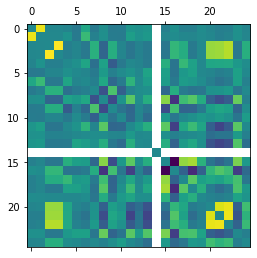

In [10]:
import matplotlib.pyplot as plt
import numpy as np


corr_matrix = cardiotography.corr()
np.fill_diagonal(corr_matrix.to_numpy(), 0)

plt.matshow(corr_matrix)

In [11]:
print(corr_matrix)

                 b         e       LBE        LB        AC        FM  \
b         0.000000  0.944912 -0.020400 -0.020400 -0.038359 -0.133849   
e         0.944912  0.000000 -0.013979 -0.013979  0.071572 -0.119249   
LBE      -0.020400 -0.013979  0.000000  1.000000 -0.077967 -0.033305   
LB       -0.020400 -0.013979  1.000000  0.000000 -0.077967 -0.033305   
AC       -0.038359  0.071572 -0.077967 -0.077967  0.000000  0.053956   
FM       -0.133849 -0.119249 -0.033305 -0.033305  0.053956  0.000000   
UC        0.225595  0.386856 -0.127722 -0.127722  0.212100 -0.036626   
ASTV     -0.126355 -0.066374  0.305570  0.305570 -0.197985 -0.116461   
MSTV      0.040505  0.044605 -0.279607 -0.279607  0.191378  0.138061   
ALTV     -0.109861 -0.104566  0.285630  0.285630 -0.345162 -0.072214   
MLTV     -0.100027 -0.108141 -0.032091 -0.032091 -0.128901  0.021031   
DL        0.091783  0.163257 -0.155908 -0.155908 -0.011350  0.076283   
DS        0.063977  0.068221 -0.053518 -0.053518 -0.039341 -0.01

## Обучение и анализ модели

Весь датасет был разделен на обучающую и тестовую выборку в соотношении ~ 2 к 1

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Было создано три классификатора для последующего сравнения точности их предсказания.  
Как видно, из результатов выолнения следующего блока кода, лучше всех показал себя  
градиентный бустинг, его мы и будем использовать как основной классификатор для предсказания, остальные  
дальше будут приведены для сравнения. В качестве измерения качества модели использовалась кросс-валидация  
с разбиенем на 3 группы.

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
svm_clf = SVC()
gbc_clf = GradientBoostingClassifier()

print(f"sgd: {cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')}")
print(f"svm: {cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')}")
print(f"gbc: {cross_val_score(gbc_clf, X_train, y_train, cv=3, scoring='accuracy')}")

sgd: [0.76       0.75368421 0.75316456]
svm: [0.78947368 0.75578947 0.78902954]
gbc: [0.88631579 0.87157895 0.89029536]


Было решено использовать другую оценку предсказывающей способности модели, а именно  
точность-отзыв (precision-recall), где $ \displaystyle precision = \frac{TP}{TP + FP}$, а $ \displaystyle recall = \frac{TP}{TP + FN}$,  
где $TP$ - true positeves (истинно положительные), $FP$ - false positives (ложно положительные),  
$FN$ - false negatives (ложно отрицательные).
В среднем были получены меньшие значения, чем в предыдущем блоке. Данная оценка позволяет  
лучше понять насколько модель хорошо делает предсказания.


In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, precision_score

def calc_precision_recall(clf, X, y) -> dict:
    y_pred = cross_val_predict(clf, X, y, cv=3)

    return {
        "precision": precision_score(y, y_pred, average='weighted'),
        "recall": recall_score(y, y_pred, average='weighted'),
    }


print(f"sgd: {calc_precision_recall(sgd_clf, X_train, y_train)}")
print(f"svm: {calc_precision_recall(svm_clf, X_train, y_train)}")
print(f"gbc: {calc_precision_recall(gbc_clf, X_train, y_train)}")

sgd: {'precision': 0.7499574575355694, 'recall': 0.7556179775280899}
svm: {'precision': 0.7946416297802646, 'recall': 0.7780898876404494}
gbc: {'precision': 0.8816291238151829, 'recall': 0.8827247191011236}


Была построена матрица ошибок (confusion matrix) для каждой из моделей на тестовом датасете.
Она позволяет понять, где ошибается модель. Строки это истинное целевое значение, а столбцы - предсказанное.
Из матрицы ниже видно, что класс С и А, SUSP и FS часто путаются, чтобы это исправить, в (данном случае) следует   
сбалансировать датасет.

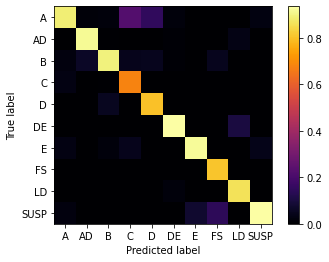

In [15]:
from sklearn.metrics import plot_confusion_matrix


def confusion_matrix(clf, X_train, y_train, X_test, y_test) -> None:
    clf.fit(X_train, y_train)
    plot_confusion_matrix(clf, X_test, y_test, 
                          include_values=False, 
                          normalize='pred', 
                          cmap='inferno',
                         )

std_params = [X_train, y_train, X_test, y_test]

confusion_matrix(gbc_clf, *std_params)

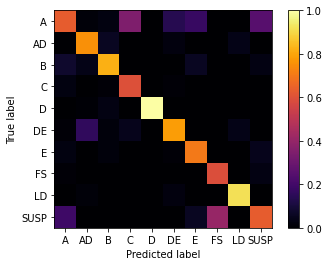

In [16]:
confusion_matrix(sgd_clf, *std_params)

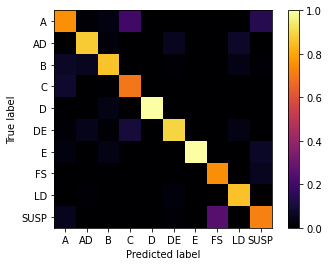

In [17]:
confusion_matrix(svm_clf, *std_params)

In [18]:
from sklearn.preprocessing import LabelEncoder

y_data = LabelEncoder().fit_transform(y_data_raw)
y_data

array([7, 1, 1, ..., 6, 6, 0])

In [19]:
import elpigraph

from elpigraph.plot import PCA
from matplotlib.colors import LinearSegmentedColormap


def ColoredPlotPG(
    X, PG, 
    figsize=(15, 10), #figure settings
    X_color="r", X_cmap="gist_rainbow",  X_alpha=0.6, #data points settings
    node_color="black", node_size=50, #nodes settings
    edge_color="black", edge_linewidth=2, edge_alpha=0.6, #edges settings
    Do_PCA=True, DimToPlot=[0, 1],
):

    if Do_PCA:
        # Perform PCA on the nodes
        mv = PG["NodePositions"].mean(axis=0)
        data_centered = PG["NodePositions"] - mv
        vglobal, nodesp, explainedVariances = PCA(data_centered)
        # Rotate the data using eigenvectors
        BaseData = np.dot((X - mv), vglobal)
        DataVarPerc = np.var(BaseData, axis=0) / np.sum(np.var(X, axis=0))

    else:
        nodesp = PG["NodePositions"]
        BaseData = X
        DataVarPerc = np.var(X, axis=0) / np.sum(np.var(X, axis=0))

    f, ax = plt.subplots(1, 1, figsize=figsize)
    
    # scatter data
    if X_color is None:
        X_color = "r" #Che eto za kostyl'?
    ax.scatter(
        BaseData[:, DimToPlot[0]], BaseData[:, DimToPlot[1]], c=X_color, cmap=X_cmap, alpha=X_alpha
    )

    # scatter nodes
    ax.scatter(nodesp[:, DimToPlot[0]], nodesp[:, DimToPlot[1]], c=node_color, s=node_size)
    
    # plot edges
    Edges = PG["Edges"][0].T
    for j in range(Edges.shape[1]):
        x_coo = np.concatenate((nodesp[Edges[0, j], [0]], nodesp[Edges[1, j], [0]]))
        y_coo = np.concatenate((nodesp[Edges[0, j], [1]], nodesp[Edges[1, j], [1]]))
        ax.plot(x_coo, y_coo, c=edge_color, linewidth=edge_linewidth, alpha=edge_alpha)

    #axises
    if Do_PCA:
        TarPGVarPerc = explainedVariances / explainedVariances.sum() * 100
    else:
        TarPGVarPerc = np.var(PG["NodePositions"], axis=0) / np.sum(
            np.var(PG["NodePositions"], axis=0)
        )
    ax.set_xlabel(f"PG % var: {TarPGVarPerc[DimToPlot[0]]:.2f}")
    ax.set_ylabel(f"PG % var: {TarPGVarPerc[DimToPlot[1]]:.2f}")
    
    mappable = ax.collections[0]
    f.colorbar(mappable=mappable)

    return plt

In [20]:
X_prep = pd.DataFrame(X)
X_prep

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.714239,-1.446091,-1.352220,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.977139,-1.150615,-0.132526,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.784718,-0.992669,-0.030884,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,-0.522937,-0.548917,0.070757,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.386452,-0.597268,-0.132526,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.320723,1.250803,0.680604,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,...,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526
2122,0.780378,1.250803,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980
2123,0.780378,0.959625,0.680604,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,...,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980
2124,0.780378,1.446355,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138,1.112980


In [21]:
tree_20 = elpigraph.computeElasticPrincipalTree(X, 20)[0]

<module 'matplotlib.pyplot' from 'd:\\dev\\Cardiotocography\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

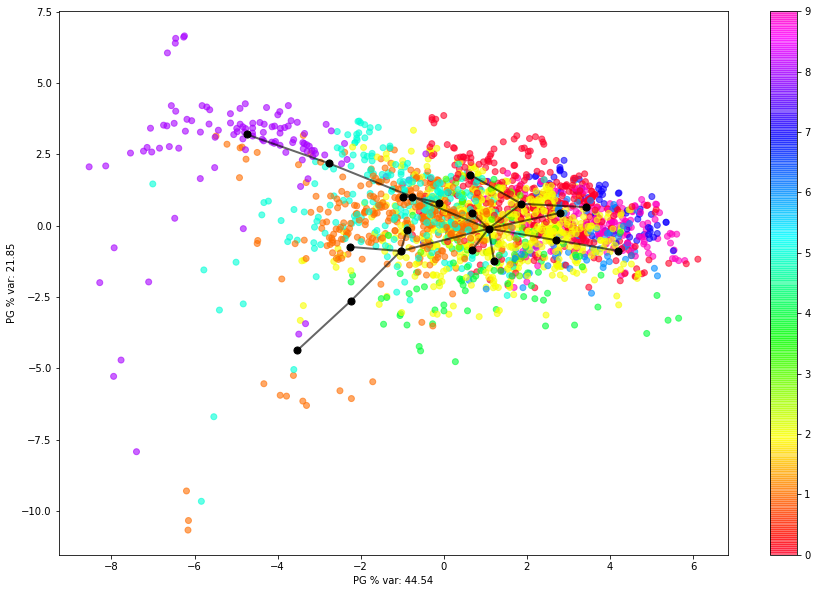

In [22]:
ColoredPlotPG(X, tree_20, X_color = y_data)

In [23]:
tree_60 = elpigraph.computeElasticPrincipalTree(X, 60)[0]

<module 'matplotlib.pyplot' from 'd:\\dev\\Cardiotocography\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

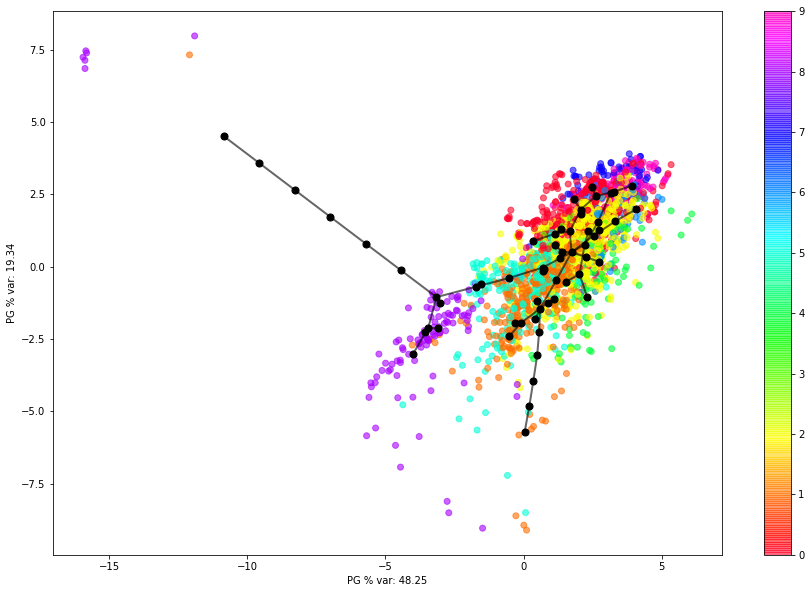

In [24]:
ColoredPlotPG(X, tree_60, X_color = y_data)

In [25]:
tree_120 = elpigraph.computeElasticPrincipalTree(X, 120)[0]

<module 'matplotlib.pyplot' from 'd:\\dev\\Cardiotocography\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

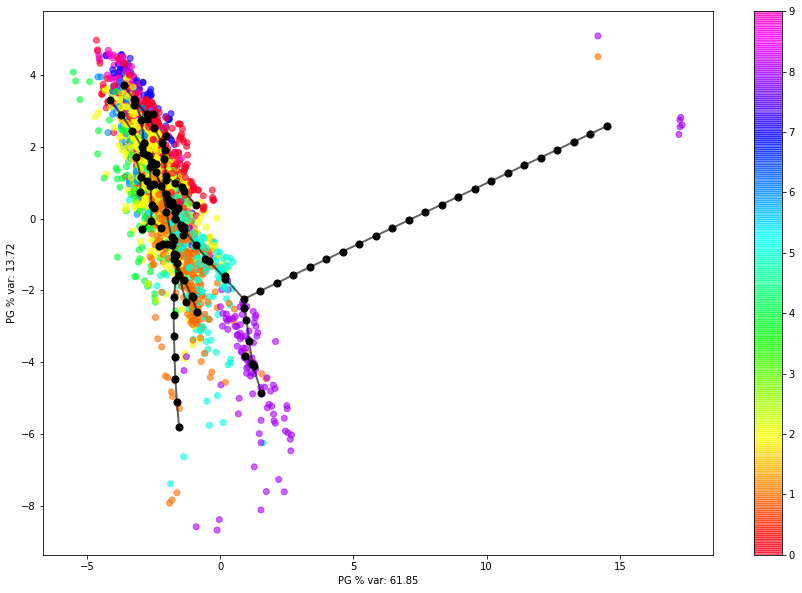

In [26]:
ColoredPlotPG(X, tree_120, X_color = y_data)

Было построено 3 графа с разным количеством вершин. Как видно из графиков, экземпляры  
датасета можно более или менее хорошо разделить между собой на классы.